## 断面形状の設定

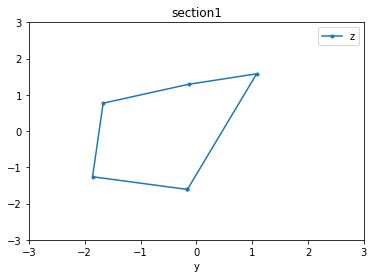

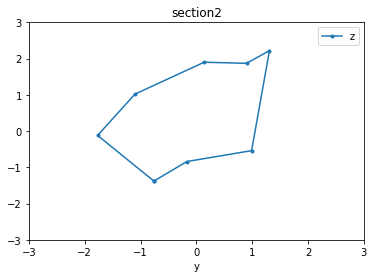

In [3]:
import pandas as pd
df1 = pd.DataFrame([[0.0, -0.16, -1.61],
                     [0.0, -1.86, -1.26],
                     [0.0, -1.67, 0.77],
                     [0.0, -0.14, 1.29],
                     [0.0, 1.08, 1.58],
                     [0.0, -0.16, -1.61]],columns=["x","y","z"])

df2 = pd.DataFrame([[1.0, -0.76, -1.38],
                     [1.0, -1.77, -0.12],
                     [1.0, -1.1, 1.02],
                     [1.0, 0.14, 1.9],
                     [1.0, 0.9, 1.87],
                     [1.0, 1.31, 2.22],
                     [1.0, 0.99, -0.54],
                     [1.0, -0.17, -0.84],
                     [1.0, -0.76, -1.38]],columns=["x","y","z"])

lim=(-3,3)
df1.plot(x="y",y="z",xlim=lim,ylim=lim,linestyle='-',marker='.',title="section1")
df2.plot(x="y",y="z",xlim=lim,ylim=lim,linestyle='-',marker='.',title="section2")

## Blenderでロフト形状を作成

In [5]:
import bpy
#立ち上げ時に存在するオブジェクト（立方体）を削除
bpy.ops.object.select_all(action="SELECT")
bpy.ops.object.delete(use_global=True)

#前処理
n1,n2 = len(df1),len(df2)#座標点の数を取得
verts = pd.concat([df1,df2]).values.tolist()#blenderで認識できるように座標点をリスト化する
faces = [[i for i in range(n1)], [i for i in range(n1,n1+n2)]]#各々の面を定義するリストを作成

#Loftの作成
mesh = bpy.data.meshes.new(name="test")
mesh.from_pydata(verts,[],faces)#点と面を作成
mesh.update
obj = bpy.data.objects.new(name="test",object_data=mesh)
scene =bpy.context.scene
bpy.context.scene.objects.link(obj)
bpy.context.scene.objects.active = obj
bpy.ops.object.mode_set(mode = "EDIT")
bpy.ops.mesh.bridge_edge_loops()#辺ループのブリッジ->ここでLoft形状が作成される
bpy.ops.object.mode_set(mode = "OBJECT")

#output
bpy.ops.wm.save_mainfile(filepath="test.blend")#blenderfileを出力
bpy.ops.export_mesh.stl(filepath="test.stl")#STLを出力

{'FINISHED'}

In [4]:
! explorer .

## FreeCADでCADジオメトリにする

In [6]:
import FreeCAD as APP
import Mesh
import Part

freecad = APP.newDocument("model")

meshobj = freecad.addObject("Mesh::Feature","MyMesh")
meshobj.Mesh = Mesh.Mesh("test.stl")

shape = Part.Shape()
shape.makeShapeFromMesh(meshobj.Mesh.Topology,0.100000)
freecad.addObject("Part::Feature","test").Shape=Part.Solid(shape)
freecad.removeObject(meshobj.Name)
freecad.recompute()
freecad.saveAs("test.FCStd")
Part.export([freecad.Objects[0]],"test.iges")